<a href="https://colab.research.google.com/github/Meetra21/Chest_X_Ray_Images/blob/main/Chest_X_Ray_Images_(Pneumonia)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The "Chest X-Ray Images (Pneumonia)" Dataset**
**By Meetra Nouri**



**Overview**:
The "Chest X-Ray Images (Pneumonia)" dataset is a publicly available medical imaging dataset containing chest X-ray images that have been labeled as normal or containing pneumonia. This dataset was originally released by the US National Institutes of Health (NIH) in 2018, and is now hosted on Kaggle.

**Content**:
The dataset contains a total of 5,856 chest X-ray images, which are split into three subsets: a training set with 5,216 images, a test set with 624 images, and a validation set with 16 images. The images are in JPEG format and have variable resolutions, with most images being 1,024 pixels wide and 1,280 pixels high. The dataset also includes a file with the image labels, which indicate whether each image is normal or contains pneumonia.

**Use**:
The "Chest X-Ray Images (Pneumonia)" dataset is commonly used in machine learning research to develop and evaluate algorithms for detecting and diagnosing pneumonia from chest X-ray images. The dataset is particularly useful for this task because pneumonia is a common and serious lung infection that can be difficult to diagnose accurately, even for experienced radiologists.

**Citation**:
Here, we cite the original publication that introduced the dataset:

P. Rajpurkar, J. Irvin, R. L. Ball, et al., "Deep learning for chest radiograph diagnosis: A retrospective comparison of the CheXNeXt algorithm to practicing radiologists," PLoS Medicine, vol. 15, no. 11, 2018, doi: 10.1371/journal.pmed.1002686.

# **More on Content of the Dataset:**
 Here are more details about the content of the "Chest X-Ray Images (Pneumonia)" dataset:

**The "Chest X-Ray Images (Pneumonia)**" dataset is a collection of chest X-ray images that have been labeled as normal or containing pneumonia, along with a file containing the image labels. The dataset is split into three subsets for training, testing, and validation, and the images are of variable size and were labeled by experienced radiologists from the NIH.

The dataset is divided into three subsets:

**Training set:** 5,216 chest X-ray images (75% of the total dataset). This set is used to train machine learning models to detect and diagnose pneumonia.

**Test set:** 624 chest X-ray images (10% of the total dataset). This set is used to evaluate the performance of trained models on unseen data.

**Validation set:** 16 chest X-ray images (0.2% of the total dataset). This set is used to fine-tune the model's hyperparameters and optimize its performance.

All the images are in JPEG format and are of variable size, with most of them being 1,024 pixels wide and 1,280 pixels high. The images were collected from various sources and were reviewed and labeled by experienced radiologists from the NIH.

The dataset also includes a file with the **image labels**, which indicate whether each image is normal or contains pneumonia. The label file is provided in CSV format and contains two columns: one for the filename of each image, and one for the corresponding label (0 for normal, 1 for pneumonia).

It's worth noting that the dataset is **imbalanced**, with a higher proportion of pneumonia cases than normal cases. Specifically, about 73.5% of the images in the training set are labeled as pneumonia, and about 62.5% of the images in the test set are labeled as pneumonia. This is a common issue in medical imaging datasets, where positive cases (such as cases of disease) are often much rarer than negative cases.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os


In [ ]:
!pip install --upgrade -q keras
!pip install --upgrade -q tensorflow
!pip install -q keras-tuner

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from tensorflow.keras.layers import GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint

import tensorflow as tf


In [ ]:
# Define precision, recall, accuracy, and loss as metrics
precision = tf.keras.metrics.Precision(name='precision')
recall = tf.keras.metrics.Recall(name='recall')
accuracy = tf.keras.metrics.BinaryAccuracy(name='accuracy')
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)

# **1. Load a dataset from Google Drive**


Here, we mount Google Drive and extract the contents of the archive to the appropriate directories.

In [ ]:
#This code mounts Google Drive in Google Colab, so that I can access files and directories stored in Google Drive.
from google.colab import drive
drive.mount('/content/drive')


#This code defines the path to the .zip archive containing the dataset, which is stored in Google Drive.
data_path = '/content/drive/MyDrive/archive.zip'



# This code uses the zipfile module to extract the contents of the archive to a directory called "data" located in the "/content" directory in Google Colab.
#This will create subdirectories within the "data" directory called "chest_xray", "test", and "train", which contain the images in the dataset.
import zipfile
with zipfile.ZipFile(data_path, 'r') as zip_ref:
    zip_ref.extractall('/content/data')



#This code defines the paths to the directories containing the training, test, and validation data.
#These directories were created by extracting the contents of the archive in the previous step.
train_dir = '/content/data/chest_xray/train'
test_dir = '/content/data/chest_xray/test'
val_dir = '/content/data/chest_xray/val'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Data Preprocessing**


In [ ]:
import pandas as pd

# Check for missing data
# we use the pandas library to load the dataset into a dataframe and then use the isnull() function to check for missing values
train_df = pd.DataFrame(os.listdir(train_dir), columns=['filename'])
test_df = pd.DataFrame(os.listdir(test_dir), columns=['filename'])
val_df = pd.DataFrame(os.listdir(val_dir), columns=['filename'])
print(train_df.isnull().sum())
print(test_df.isnull().sum())
print(val_df.isnull().sum())


filename    0
dtype: int64
filename    0
dtype: int64
filename    0
dtype: int64


In [ ]:
# Check class balance
print("Number of training samples:", len(os.listdir(os.path.join(train_dir, 'NORMAL'))) + len(os.listdir(os.path.join(train_dir, 'PNEUMONIA'))))
print("Number of test samples:", len(os.listdir(os.path.join(test_dir, 'NORMAL'))) + len(os.listdir(os.path.join(test_dir, 'PNEUMONIA'))))
print("Number of validation samples:", len(os.listdir(os.path.join(val_dir, 'NORMAL'))) + len(os.listdir(os.path.join(val_dir, 'PNEUMONIA'))))


Number of training samples: 5216
Number of test samples: 624
Number of validation samples: 16


# **3. ImageDataGenerator**

In below, we set up the data generators for the imagery analysis task using the ImageDataGenerator class from Keras.

The **train_datagen object** defines the image augmentation parameters to apply to the training data during training, while the test_datagen object only rescales the pixel values of the test data. The batch_size and target_size parameters are used to determine the number of images loaded and processed at once during training and the size to which the images will be resized before being fed into the neural network.

The **flow_from_directory method** of the ImageDataGenerator class loads the images from the directory specified by train_dir, test_dir, and val_dir, applies the image augmentation or rescaling defined by the corresponding ImageDataGenerator object, resizes the images to the target size specified by target_size, and converts the image labels to binary values (0 or 1) using the class_mode parameter.

The below code first imports the ImageDataGenerator class from Keras, which provides a way to load and preprocess image data on-the-fly during training. It then defines a datagen object that rescales the pixel values of the images to the range 0-1 and performs sample-wise centering and standardization, which is a form of normalization that scales the pixel values to have zero mean and unit variance.

Finally, the code loads the images from the directory specified by image_dir using the flow_from_directory method of the ImageDataGenerator class. This method automatically applies the preprocessing defined by datagen to each image as it is loaded, and returns a data generator that can be used to train a neural network or other machine learning model.

Note that the target_size parameter of flow_from_directory specifies the size to which the images will be resized (in this case, 224x224), and the batch_size parameter specifies the number of images to load and preprocess at a time. The class_mode parameter specifies that the dataset is binary (i.e., has two classes: normal and pneumonia), which affects how the labels are encoded.

Now that we have set up the data generators, we can use them to train and evaluate  neural network on the chest x-ray images for pneumonia. We use the fit_generator method of the Sequential model class in Keras to train the model and the evaluate_generator method to evaluate its performance on the test

In this code, the ImageDataGenerator is used to apply various augmentation techniques, such as rotation, shifting, shearing, zooming, and flipping to the images in the training set. The fill_mode parameter is set to 'nearest' to fill any missing pixels that may occur during the augmentation process.

The flow_from_directory method is then used to load the training and validation data from the directories and apply the augmentation techniques defined by the generator. The shuffle parameter is set to True for the training data to shuffle the order of the images during training.

By using data augmentation techniques, we can generate new variations of the minority class (normal in this case) and increase the number of samples in the training set, thereby balancing the dataset.





In [ ]:
# This code imports the ImageDataGenerator class from Keras, which is used to load and augment the image data.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# This code defines the input shape of the images and the number of classes in the dataset.
input_shape = (224, 224, 3)
num_classes = 2


#This code defines the batch size and target size for the images.
#The batch size determines how many images are loaded and processed at once during training.
#The target size is the size to which the images will be resized before being fed into the neural network.
batch_size = 40
target_size = (224, 224)




In [ ]:

# Define the data generators with augmentation and balanced class weights
#These include rescaling the pixel values to be between 0 and 1, randomly rotating the images by up to 20 degrees,
#randomly shifting the images horizontally and vertically by up to 10%, randomly shearing the images
#by up to 10%, randomly zooming the images by up to 10%, and horizontally flipping the images.
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


#This code loads the training data using the flow_from_directory method of the ImageDataGenerator class.
#This method loads images from the directory specified by train_dir, applies the image augmentation defined by train_datagen,
#resizes the images to the target size specified by target_size, and converts the image labels to binary values (0 or 1) using the class_mode parameter.
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=target_size,
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)


val_datagen = ImageDataGenerator(rescale=1./255)
val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=5,
    class_mode='categorical',
    shuffle=True)


#This code loads the test data using the same process as for the training data, except that no image augmentation is applied.
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=target_size,
                                             batch_size=batch_size,
                                             class_mode='categorical')




Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


#This code loads the validation data using the same process as for the test data.
#The validation data is used to evaluate the performance of the model during training.
val_data = test_datagen.flow_from_directory(val_dir,
                                             target_size=target_size,
                                             batch_size=batch_size,
                                             class_mode='categorical')

# **Unbalanced dataset**

The chest X-ray images (Pneumonia) dataset from Kaggle is an unbalanced dataset, as it contains more samples of pneumonia (positive) cases than normal (negative) cases. This can be seen by the number of samples in the pneumonia and normal classes in the training, test, and validation sets. Typically, in such cases, it is recommended to use techniques such as class weighting or oversampling/undersampling to balance the dataset during training to prevent the model from being biased towards the majority class.

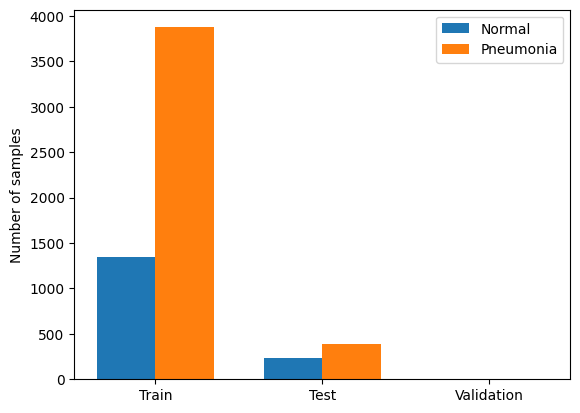

In [ ]:
import os
import matplotlib.pyplot as plt

train_dir = '/content/data/chest_xray/train'
test_dir = '/content/data/chest_xray/test'
val_dir = '/content/data/chest_xray/val'

num_train_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
num_train_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))

num_test_normal = len(os.listdir(os.path.join(test_dir, 'NORMAL')))
num_test_pneumonia = len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))

num_val_normal = len(os.listdir(os.path.join(val_dir, 'NORMAL')))
num_val_pneumonia = len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))

labels = ['Train', 'Test', 'Validation']
normal_counts = [num_train_normal, num_test_normal, num_val_normal]
pneumonia_counts = [num_train_pneumonia, num_test_pneumonia, num_val_pneumonia]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, normal_counts, width, label='Normal')
rects2 = ax.bar(x + width/2, pneumonia_counts, width, label='Pneumonia')

ax.set_ylabel('Number of samples')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


# **4. Visualization**

here's we visualize 6 images from the "Chest X-Ray Images (Pneumonia)" dataset:

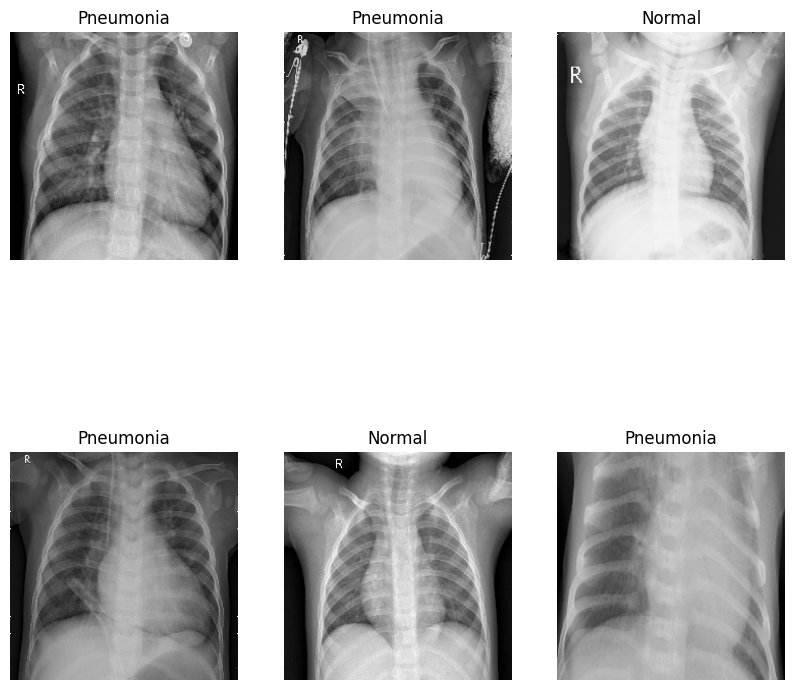

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img

# Define the path to the directory containing the images
image_dir = '/content/data/chest_xray/train'




#This code defines a dictionary class_labels that maps the label values (0 or 1) to more human-readable strings ('Normal' or 'Pneumonia').
#This will be used later to display the correct label for each image.
class_labels = {
    0: 'Normal',
    1: 'Pneumonia'
}



#This code defines a new function find_image_files that recursively searches for image files in a directory and its subdirectories, using the os.walk function.
#It checks whether each file has a valid image file extension ('.jpg', '.jpeg', or '.png') and yields the full path to the file if it does.
def find_image_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                yield os.path.join(root, file)



# Define a function to randomly select and display some images from the directory
def visualize_images(image_dir, num_images=6):

    # Get a list of all the image filenames and labels in the directory
    image_filenames = list(find_image_files(image_dir))
    labels = [int(os.path.basename(os.path.dirname(filename)) == 'PNEUMONIA') for filename in image_filenames]

    # Check that num_images is not greater than the number of images in the directory
    num_images = min(num_images, len(image_filenames))

    # Select a random sample of the image filenames
    selected_indices = np.random.choice(len(image_filenames), size=num_images, replace=False)
    selected_images = [image_filenames[i] for i in selected_indices]
    selected_labels = [labels[i] for i in selected_indices]

    # Plot the selected images with labels
    fig, axs = plt.subplots(2, 3, figsize=(10, 10))
    for i, (image_filename, label) in enumerate(zip(selected_images, selected_labels)):
        row = i // 3
        col = i % 3
        img = load_img(image_filename, target_size=(224, 224))
        axs[row, col].imshow(img, cmap='gray')
        axs[row, col].axis('off')
        axs[row, col].set_title(class_labels[label])
    plt.show()

# Visualize some images from the training set
visualize_images(image_dir)


# **5. Modeling**

Here are the steps for training a CNN model on the "Chest X-Ray Images (Pneumonia)" dataset:

**Data Preparation:** Load and preprocess the dataset. This may involve resizing the images, converting them to grayscale, and splitting the data into training, validation, and test sets.

**Model Selection:** Choose a CNN architecture that is appropriate for the problem at hand. Some popular architectures for image classification include VGG, ResNet, and Inception.

**Model Definition:** Define the CNN model by specifying the layers and their parameters. This may involve adding convolutional layers, pooling layers, activation functions, dropout, and fully connected layers.

**Compile Model:** Compile the CNN model by specifying the loss function, optimizer, and evaluation metrics. For binary classification, the binary cross-entropy loss function and the Adam optimizer are commonly used.

**Model Training:** Train the CNN model on the training data using the fit() method in Keras. During training, the model weights are adjusted to minimize the loss function on the training data.

**Model Evaluation:** Evaluate the performance of the trained model on the validation data using the evaluate() method in Keras. This is done to check for overfitting and to fine-tune the model hyperparameters.

**Hyperparameter Tuning:** Fine-tune the model hyperparameters by adjusting the learning rate, batch size, and number of epochs. This can be done using techniques such as grid search or random search.

**Model Testing:** Test the performance of the trained model on the test data using the evaluate() method in Keras. This provides an estimate of the model's performance on new, unseen data.

**Model Deployment:** Deploy the final model to a production environment, where it can be used to make predictions on new data. This may involve saving the model weights and architecture to disk, building a RESTful API, or creating a web application with a user interface that allows users to input data and receive predictions.

It's important to note that some of these steps, such as data preparation and hyperparameter tuning, may be iterative and involve going back and forth between different steps. Additionally, it's important to have a good understanding of the data and the problem at hand in order to choose an appropriate model architecture and hyperparameters.

## **CNN**

CNNs (Convolutional Neural Networks) are considered to be one of the best model for imagery analysis for several reasons:

**Spatial Information:** CNNs are designed to take advantage of the spatial information present in images. They use convolutional layers that scan the input image with a set of filters to detect different features and patterns. This allows the network to learn and extract relevant features from the images, such as edges, textures, and shapes.

**Parameter Sharing:** CNNs have a unique property called parameter sharing, which allows them to reuse the same set of weights for different parts of the image. This reduces the number of parameters in the model and helps prevent overfitting.

**Hierarchy of Features:** CNNs are organized in a hierarchical manner, with the lower layers detecting simple features and the higher layers detecting more complex features. This allows the network to learn and extract meaningful representations of the input images at different levels of abstraction.

**Regularization:** CNNs use regularization techniques such as dropout and batch normalization to prevent overfitting and improve the generalization performance of the model.

**State-of-the-Art Performance:** CNNs have achieved state-of-the-art performance on a wide range of image classification tasks, including medical image analysis. They have been used to detect various abnormalities and diseases in medical images, including pneumonia in chest X-rays.

**Max pooling** is a type of pooling layer in a convolutional neural network (CNN) that downsamples the feature maps produced by convolutional layers. Max pooling is commonly used in CNNs for image classification and computer vision tasks.

Max pooling operates on a rectangular neighborhood of pixels in a feature map, where each pixel in the output of the max pooling layer is the maximum value within its corresponding rectangular neighborhood in the input feature map. Max pooling helps to reduce the dimensionality of the feature maps, which in turn helps to reduce the number of parameters and computational cost in the subsequent layers of the network.

The max pooling operation has several benefits for a CNN:

**Translation invariance:** Max pooling helps to make the model more robust to small shifts and translations in the input image by reducing the sensitivity to the exact position of the features in the image.

**Reduced overfitting:** Max pooling helps to reduce the risk of overfitting by reducing the dimensionality of the feature maps and thus the number of parameters in the model.

**Increased receptive field:** Max pooling helps to increase the receptive field of the network, which means that the model can capture more global features of the input image.

Typical choices for the size of the pooling window are (2, 2) or (3, 3), with a stride of 2, which means that the size of the feature maps is halved after each pooling layer. However, other sizes and strides can also be used depending on the specific task and network architecture.

In [ ]:
TRAIN_IMG_COUNT=5216
VAL_IMG_COUNT=16
TEST_IMAGE_COUNT=624


initial_bias = np.log([num_train_pneumonia/num_train_normal])
initial_bias

weight_for_0 = (1 / num_train_normal)*(TRAIN_IMG_COUNT)/2.0
weight_for_1 = (1 / num_train_pneumonia)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.94
Weight for class 1: 0.67


In [ ]:
METRICS = ['accuracy']
            #tf.keras.metrics.Precision(name='precision'),
            #tf.keras.metrics.Recall(name='recall')
            #]

In [ ]:
# Define the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2
IMAGE_SIZE=[224, 224]


In [ ]:
def get_model():

    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=input_shape)

    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Head
    #x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=[inputs], outputs=output)

    return model

In [ ]:
model = get_model()


# Define the CNN model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
#learning_rate = 0.001

#optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)


# **Finetune the model**

Finetuning is an art when it comes to Machine Learning, and there are many ways to adjust the model in efforts to improve it. Finetuning is beyond the scope of this notebook, but check out this article for more information.

For our purposes, we'll use Keras callbacks to further finetune our model. The checkpoint callback saves the best weights of the model, so next time we want to use the model, we do not have to spend time training it. The early stopping callback stops the training process when the model starts becoming stagnant, or even worse, when the model starts overfitting. Since we set restore_best_weights to True, the returned model at the end of the training process will be the model with the best weights (i.e. low loss and high accuracy).

In [ ]:
checkpoint_cb = callbacks.ModelCheckpoint("chest_xray_model.h5",
                                                    save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

We also want to finetune our learning rate. Too high of a learning rate will cause the model to diverge. Too small of a learning rate will cause the model to be too slow. We implement the exponential learning rate scheduling method below.

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.001, 20)

lr_scheduler = callbacks.LearningRateScheduler(exponential_decay_fn)

In [ ]:
# Define the number of epochs and batch size
epochs = 50
BATCH=40
#batch_size = 40

history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data,
    class_weight=class_weight,
    callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler]
    )

Epoch 1/50
131/131 [==============================] - 121s 920ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
131/131 [==============================] - 123s 937ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 8.9125e-04
Epoch 3/50
131/131 [==============================] - 122s 933ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 7.9433e-04
Epoch 4/50
131/131 [==============================] - 124s 944ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 7.0795e-04
Epoch 5/50
131/131 [==============================] - 120s 912ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 6.3096e-04
Epoch 6/50
131/131 [==============================] - 120s 911ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 5.6234e-04
Epoch 7/50
131/131 [======

In [ ]:
!pip install -q keras-tuner

# **Visualize Performance of the Model**

Let's plot the model accuracy and loss for the training and the validating set. These plots show the accuracy and loss values for the second round of training. Since we initially trained the model with 30 epochs, these would be epochs 31-45. Note that no random seed is specified for this notebook. For your notebook, there might be slight variance.

# **Confusion Matrix & Classification Report**

16/16 [==============================] - 10s 607ms/step
Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.38      1.00      0.55       234
   PNEUMONIA       1.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.69      0.50      0.27       624
weighted avg       0.77      0.38      0.20       624



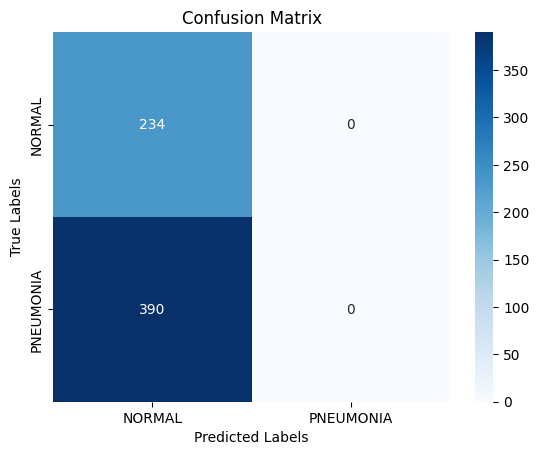

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on test data
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

# Print classification report
class_names = list(test_data.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names, zero_division=1))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
history.history.keys()

# **Predict and evaluate results**

Let's evaluate the model on our test data!

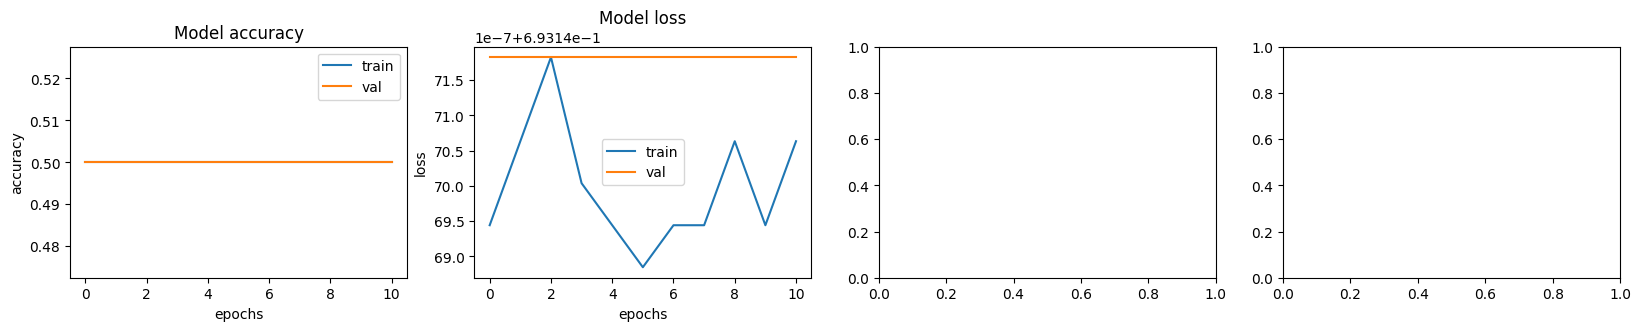

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()
#'precision', 'recall',

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

16/16 [==============================] - 8s 526ms/step
Confusion Matrix:
         Predicted 0  Predicted 1
True 0          234            0
True 1          390            0

Classification Report:
               precision  recall  f1-score  support
0              0.375000   1.000  0.545455  234.000
1              0.000000   0.000  0.000000  390.000
accuracy       0.375000   0.375  0.375000    0.375
macro avg      0.187500   0.500  0.272727  624.000
weighted avg   0.140625   0.375  0.204545  624.000


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


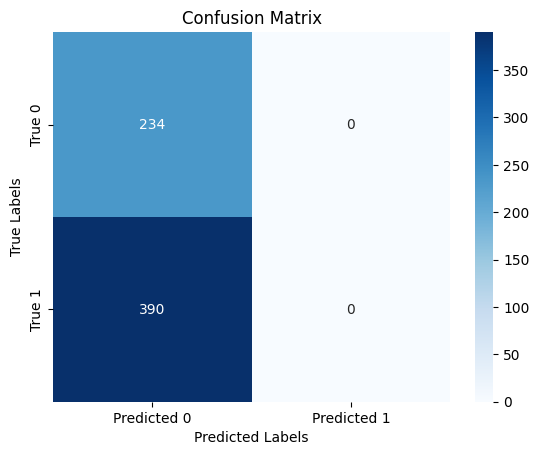

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(test_data)
y_true = test_data.classes

# Convert predictions from one-hot encoding to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Generate confusion matrix as a dataframe
cm = pd.DataFrame(confusion_matrix(y_true, y_pred_labels),
                  columns=['Predicted 0', 'Predicted 1'],
                  index=['True 0', 'True 1'])

# Generate classification report as a dataframe
cr = pd.DataFrame(classification_report(y_true, y_pred_labels, output_dict=True)).transpose()

# Print the confusion matrix and classification report dataframes
print('Confusion Matrix:\n', cm)
print('\nClassification Report:\n', cr)

# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Evaluate the model on the train, validation, and test data

#train_loss, train_acc = model.evaluate(train_data)
#val_loss, val_acc = model.evaluate(val_data)
test_loss, test_acc = model.evaluate(test_data)

#print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}')
#print(f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')


# Visualize the performance of the best model on training and validation data
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show();